In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [3]:
results = pd.read_csv('MOB_final_results.csv', index_col=0)
ms_results = pd.read_csv('MOB_MS_results.csv', index_col=0)
sample_info = pd.read_csv('MOB_sample_info.csv', index_col=0)

In [4]:
df = pd.read_csv('data/Rep11_MOB_0.csv', index_col=0)
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes
sample_info = sample_info.query('total_counts > 10')  # Remove empty features
df = df.loc[sample_info.index]
dfm = np.log10(df + 1)

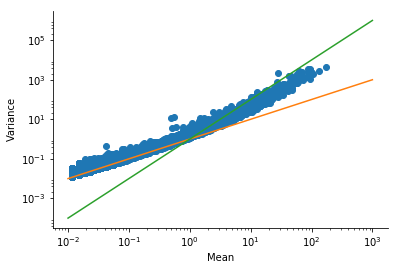

In [5]:
figsize(6, 4)
plt.loglog()
plt.scatter(df.mean(), df.var());
xy = [1e-2, 1e3]
plt.plot(xy, xy, c='C1');
plt.plot(xy, np.square(xy), c='C2');
plt.xlabel('Mean')
plt.ylabel('Variance');

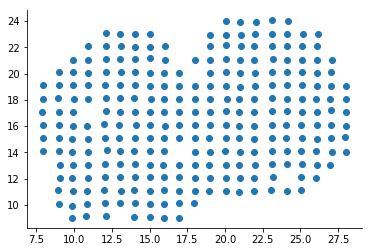

In [6]:
plt.scatter(sample_info.x, sample_info.y);

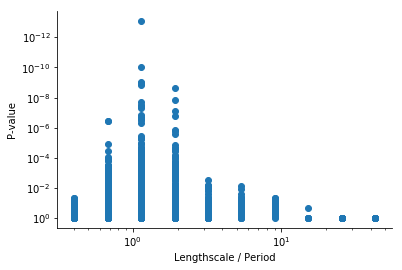

In [7]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

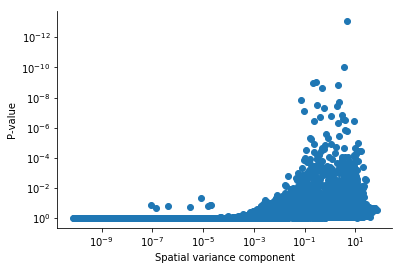

In [8]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

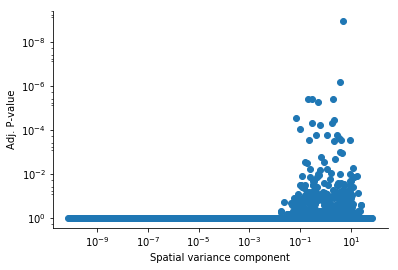

In [9]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Adj. P-value');

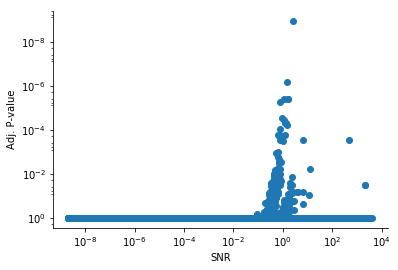

In [10]:
plt.loglog()
plt.scatter(1. / results.max_delta, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('Adj. P-value');

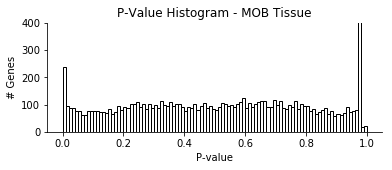

In [11]:
figsize(6, 2)
plt.hist(results.pval, bins=100, color='w', ec='k');
plt.title('P-Value Histogram - MOB Tissue')
plt.ylabel('# Genes')
plt.xlabel('P-value');
plt.ylim(ymax=400)

plt.savefig('MOB-pvalue-hist.pdf')

In [12]:
ms_results.model.value_counts()

SE     48
PER    19
Name: model, dtype: int64

In [13]:
N = 6
top_per_ls = ms_results.query('qval < 0.05') \
    .sort_values('qval', ascending=True) \
    .groupby(['model', 'l']) \
    .head(N) \
    .sort_values(['l', 'qval'], ascending=[True, True])

top_per_ls

,BIC,Gower,LLR,M,fraction_spatial_variance,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,time,pval,qval,max_ll_null
22,571.962278,0.993506,25.974549,4,0.865678,Cdr1,0.675535,0.154156,-274.859776,-4.861639,9.057264,SE,260,0.001036,3.459481e-07,2.855801e-04,-300.834325
24,-737.035688,0.993506,25.784579,4,0.997975,Taf7l,0.675535,0.002016,379.639207,0.759994,0.226436,SE,260,0.000504,3.817263e-07,2.985300e-04,353.854628
23,-916.625447,0.993506,19.150605,4,0.924751,4933405L10Rik,0.675535,0.080844,469.434087,0.793755,0.236625,SE,260,0.001037,1.207992e-05,5.983184e-03,450.283482
21,40.499266,0.993506,16.974369,4,0.701323,Tspan7,0.675535,0.423110,-9.128270,-6.006126,11.899157,SE,260,0.000599,3.788785e-05,1.387103e-02,-26.102639
26,-827.326060,0.993506,14.827756,4,0.999511,Olfr635,0.675535,0.000486,424.784393,0.885008,0.304648,SE,260,0.000642,1.177891e-04,3.182233e-02,409.956637
25,-827.326060,0.993506,14.827756,4,0.999511,Gna14,0.675535,0.000486,424.784393,0.885008,0.304648,SE,260,0.000749,1.177891e-04,3.182233e-02,409.956637
51,72.920564,0.976428,55.875922,4,0.720274,Cpe,1.135190,0.379205,-25.338919,-5.626476,4.628933,SE,260,0.000521,7.716050e-14,1.146528e-09,-81.214841
31,331.780927,0.976428,41.966229,4,0.586902,Fabp7,1.135190,0.687270,-154.769100,5.036316,3.603940,SE,260,0.000507,9.286349e-11,6.899293e-07,-196.735329
48,402.569494,0.976428,37.573584,4,0.614457,Cck,1.135190,0.612662,-190.163384,-0.673485,0.281531,SE,260,0.000598,8.802861e-10,4.071584e-06,-227.736968
46,371.451514,0.976428,37.146026,4,0.530409,Kif5b,1.135190,0.864467,-174.604394,0.639634,0.208328,SE,260,0.000500,1.096059e-09,4.071584e-06,-211.750420


In [14]:
top_per_ls.shape

(25, 17)

In [15]:
model_colors = {'SE': 'C0', 'PER': 'C1', 'linear': 'C2'}

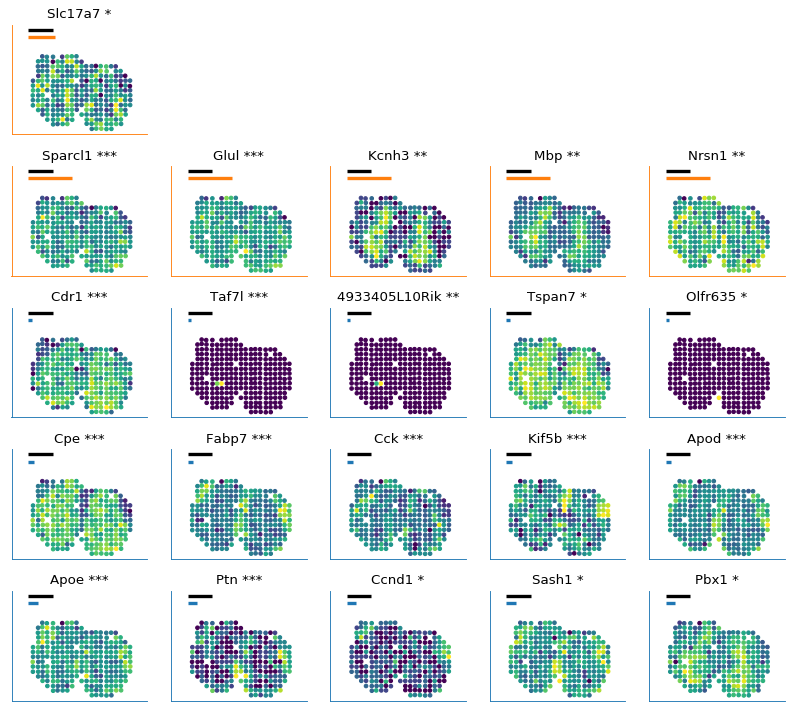

In [27]:
plt.figure(figsize=(12, 9), dpi=80)

N = 6
N_rows = top_per_ls.replace(np.nan, 0).groupby(['model', 'l']).size().shape[0]
for j, T in enumerate(top_per_ls.groupby(['model', 'l'])):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        ax = plt.subplot(N_rows, N, j * N + i + 1)
        
        plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=10, rasterized=True);

        s = ' *'
        if r['qval'] < 0.01:
            s = ' **'

        if r['qval'] < 0.001:
            s = ' ***'

        plt.title(r['g'].replace("'", '') + s)
        
        plt.xticks([])
        plt.yticks([])
        plt.hlines(-3.5, 7, 7 + 5, lw=3)
        if r['l'] + 7 < 28:
            plt.hlines(-5, 7, 7 + r['l'], lw=3, color=model_colors[r['model']], zorder=0)
            
        else:
            plt.hlines(-5, 7, 25.5, lw=3, color=model_colors[r['model']], zorder=0)
            plt.plot([25, 26], [-6, -4], lw=1, color=model_colors[r['model']])
            plt.plot([26, 27], [-6, -4], lw=1, color=model_colors[r['model']])
            plt.hlines(-5, 26.5, 31, lw=3, color=model_colors[r['model']])
            
        for spine in ax.spines.values():
            spine.set_edgecolor(model_colors[r['model']])
        
        plt.axis('equal')

plt.tight_layout()
plt.savefig('top_MOB_genes_per_ls.pdf')

In [17]:
N = 5
top_per_ls = ms_results.query('qval < 0.05') \
    .sort_values('qval', ascending=True) \
    .groupby(['model', 'l']) \
    .head(N) \
    .sort_values(['l', 'qval'], ascending=[True, True])

In [26]:
stahl_genes = [
                'Penk', 'Doc2g', 'Kctd12',
                'Camk4', 'Vip', 'Th',
                'Nrgn', 'Pcp4', 'Rbfox3', 'Nrsn1', 'Calb2', 'Eomes'
              ]

results.query('g in @stahl_genes')[['g', 'model', 'qval', 'l']]

,g,model,qval,l
3279,Vip,SE,0.980652,0.675535
5023,Pcp4,SE,0.012950,1.135190
5067,Eomes,SE,0.128733,1.135190
5129,Rbfox3,SE,0.030980,1.135190
5202,Camk4,SE,0.146394,1.135190
5227,Penk,SE,0.020571,1.135190
6859,Doc2g,SE,0.000051,1.135190
7006,Nrgn,SE,0.005473,1.135190
7113,Kctd12,SE,0.000063,1.135190
11770,Th,SE,0.980652,1.907609


In [28]:
ms_results.query('g in @stahl_genes')[['g', 'model', 'qval', 'l']]

,g,model,qval,l
1,Pcp4,PER,0.012950,9.052138
2,Rbfox3,PER,0.030980,9.052138
5,Nrgn,PER,0.005473,9.052138
17,Nrsn1,PER,0.001684,9.052138
29,Penk,SE,0.020571,1.135190
52,Doc2g,SE,0.000051,1.135190
56,Kctd12,SE,0.000063,1.135190


In [29]:
9 / 5

1.8

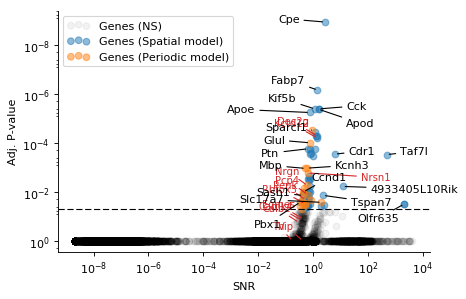

In [34]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('qval > 0.05')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.05, rasterized=True, label='Genes (NS)', marker='o', color='k');

tmp = ms_results.query('model == "SE"')
plt.scatter(1. / tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Spatial model)', marker='o', color='C0');

tmp = ms_results.query('model == "PER"')
tmp = tmp.drop('max_delta', 1).merge(results[['g', 'max_delta']], on='g')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Periodic model)', marker='o', color='C1');

# Annotate Stahl genes
tmp = results.query('g in @stahl_genes')

for i, r in tmp.iterrows():
    xy = (1./r['max_delta'], r['qval'])
    xyt = (xy[0] / x_offsets.get(r['g'], 2),
           xy[1] / y_offsets.get(r['g'], 3),)
    plt.annotate(r['g'], xy, xyt, color='tab:red', horizontalalignment='right',
                 arrowprops={'arrowstyle': '-', 'color': 'tab:red'}, size=9)

# Annotate top genes
x_offsets = {
    'Apc': 1e1,
    '4933405L10Rik': 1e1,
    'Cck': 1e1,
    'Apoe': 1e-3,
    'Apod': 1e1,
    'Nrsn1': 1e-3,
    'Kcnh3': 1e1,
    'Ccnd1': 2e0,
    'Tspan7': 1e1,
    'Taf7l': 3,
    'Cdr1': 3,
    'Slc17a7': 1e-3
}
y_offsets = {
    'Apod': 2e-1,
    'Pbx1': 1e-1,
    'Olfr635': 2e-1,
    'Tspan7': 4e-1,
    '4933405L10Rik': 6e-1,
    'Ccnd1': 3e0,
    'Kif5b': 2e0,
    'Fabp7': 2e0,
    'Ptn':5e-1,
    'Nrsn1':5e-1
}
for i, r in results.query('g in @top_per_ls.g').query('g not in @stahl_genes').iterrows():
    xy = (1. / r['max_delta'], r['qval'])
    xyt = (xy[0] * x_offsets.get(r['g'], 2e-2),
           xy[1] / y_offsets.get(r['g'], 1),)
    plt.annotate(r['g'].replace("'", ''), xy, xyt, color='k', arrowprops={'arrowstyle': '-'})

plt.axhline(0.05, ls='--', c='k', lw=1)
plt.xlabel('SNR');
plt.ylabel('Adj. P-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left');

plt.savefig('sigma_pval_MOB.pdf', bbox_inches='tight');

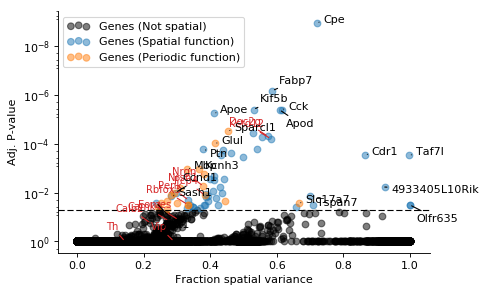

In [41]:
plt.figure(figsize=(6, 4), dpi=80)

# plt.xscale('log')
plt.yscale('log')

tmp = results.query('qval > 0.05')
plt.scatter(tmp['fraction_spatial_variance'], tmp['qval'],
            alpha=0.5, rasterized=True,
            label='Genes (Not spatial)', marker='o', color='k');

tmp = ms_results.query('model == "SE"')
plt.scatter(tmp['fraction_spatial_variance'], tmp['qval'],
            alpha=0.5, rasterized=True,
            label='Genes (Spatial function)', marker='o', color='C0');

tmp = ms_results.query('model == "PER"')
tmp = tmp.drop('fraction_spatial_variance', 1).merge(results[['g', 'fraction_spatial_variance']], on='g')
plt.scatter(tmp['fraction_spatial_variance'], tmp['qval'],
            alpha=0.5, rasterized=True,
            label='Genes (Periodic function)', marker='o', color='C1');

# Annotate Stahl genes
tmp = results.query('g in @stahl_genes')

for i, r in tmp.iterrows():
    xy = (r['fraction_spatial_variance'], r['qval'])
    xyt = (xy[0] - x_offsets.get(r['g'], 0.02),
           xy[1] / y_offsets.get(r['g'], 3),)
    plt.annotate(r['g'], xy, xyt, color='tab:red', horizontalalignment='right',
                 arrowprops={'arrowstyle': '-', 'color': 'tab:red'}, size=9)

# Annotate top genes
x_offsets = {}
# x_offsets = {
#     'Apc': 1e1,
#     '4933405L10Rik': 1e1,
#     'Cck': 1e1,
#     'Apoe': 1e-3,
#     'Apod': 1e1,
#     'Nrsn1': 1e-3,
#     'Kcnh3': 1e1,
#     'Ccnd1': 2e0,
#     'Tspan7': 1e1,
#     'Taf7l': 3,
#     'Cdr1': 3,
#     'Slc17a7': 1e-3
# }
y_offsets = {
    'Apod': 2e-1,
    'Pbx1': 1e-1,
    'Olfr635': 2e-1,
    'Tspan7': 4e-1,
    '4933405L10Rik': 6e-1,
    'Ccnd1': 3e0,
    'Kif5b': 2e0,
    'Fabp7': 2e0,
    'Ptn':5e-1,
    'Nrsn1':5e-1
}
for i, r in results.query('g in @top_per_ls.g').query('g not in @stahl_genes').iterrows():
    xy = (r['fraction_spatial_variance'], r['qval'])
    xyt = (xy[0] + x_offsets.get(r['g'], 2e-2),
           xy[1] / y_offsets.get(r['g'], 1),)
    plt.annotate(r['g'].replace("'", ''), xy, xyt, color='k', arrowprops={'arrowstyle': '-'})

plt.axhline(0.05, ls='--', c='k', lw=1)
plt.xlabel('Fraction spatial variance');
plt.ylabel('Adj. P-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left');

In [44]:
results.query('g in @stahl_genes').sort_values('qval')[['g', 'qval']]

,g,qval
6859,Doc2g,0.000051
7113,Kctd12,0.000063
12355,Nrsn1,0.001684
7006,Nrgn,0.005473
5023,Pcp4,0.012950
5227,Penk,0.020571
5129,Rbfox3,0.030980
5067,Eomes,0.128733
5202,Camk4,0.146394
11981,Calb2,0.175826
